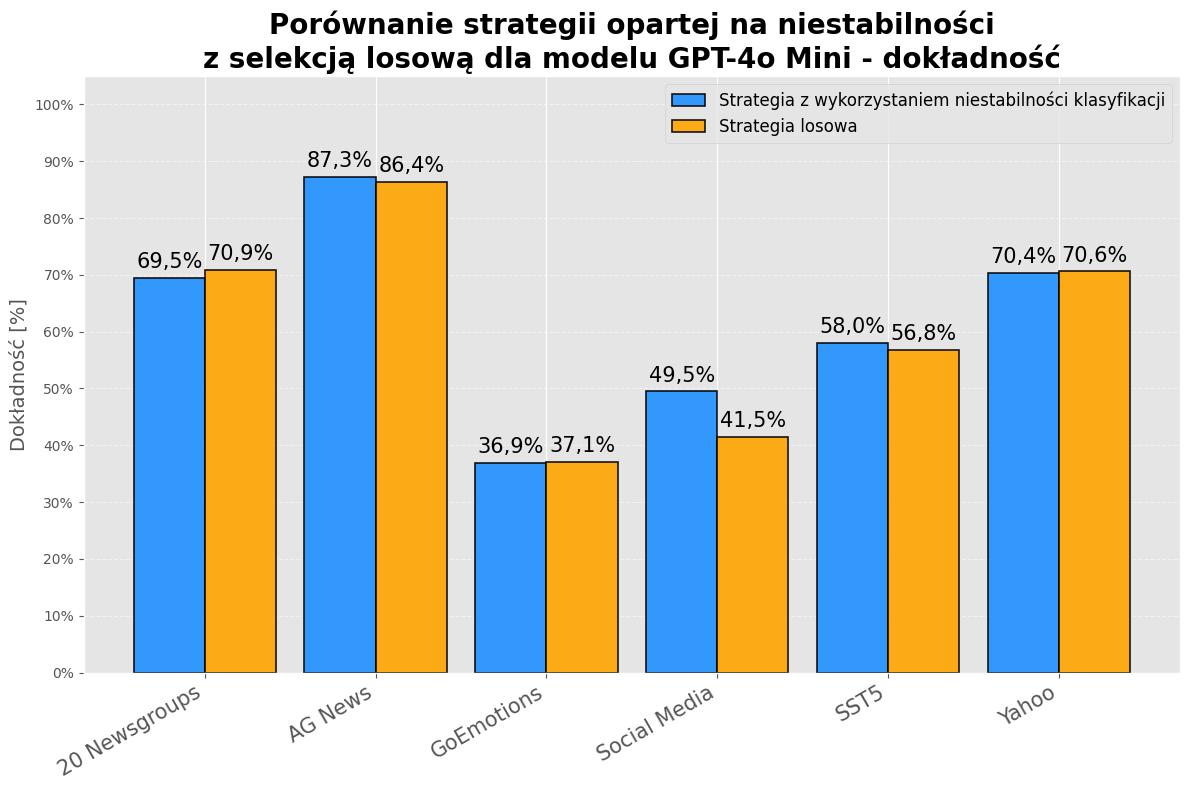

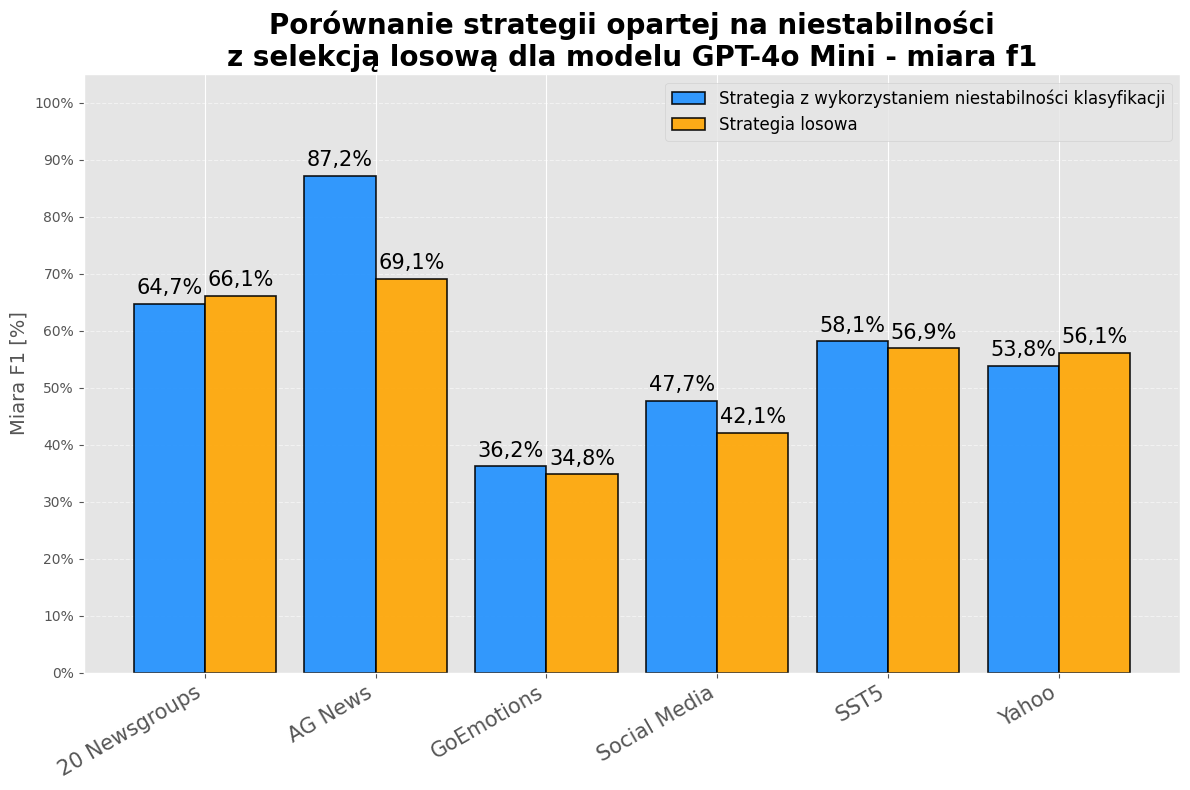

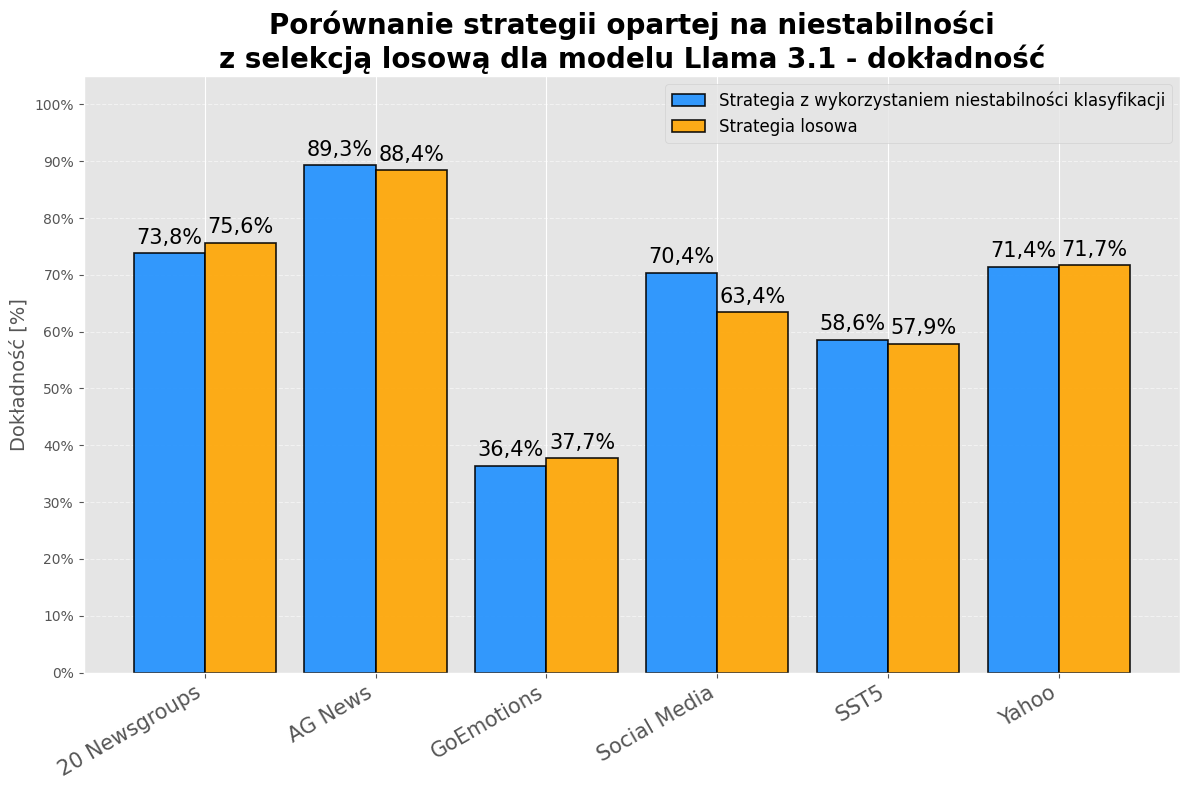

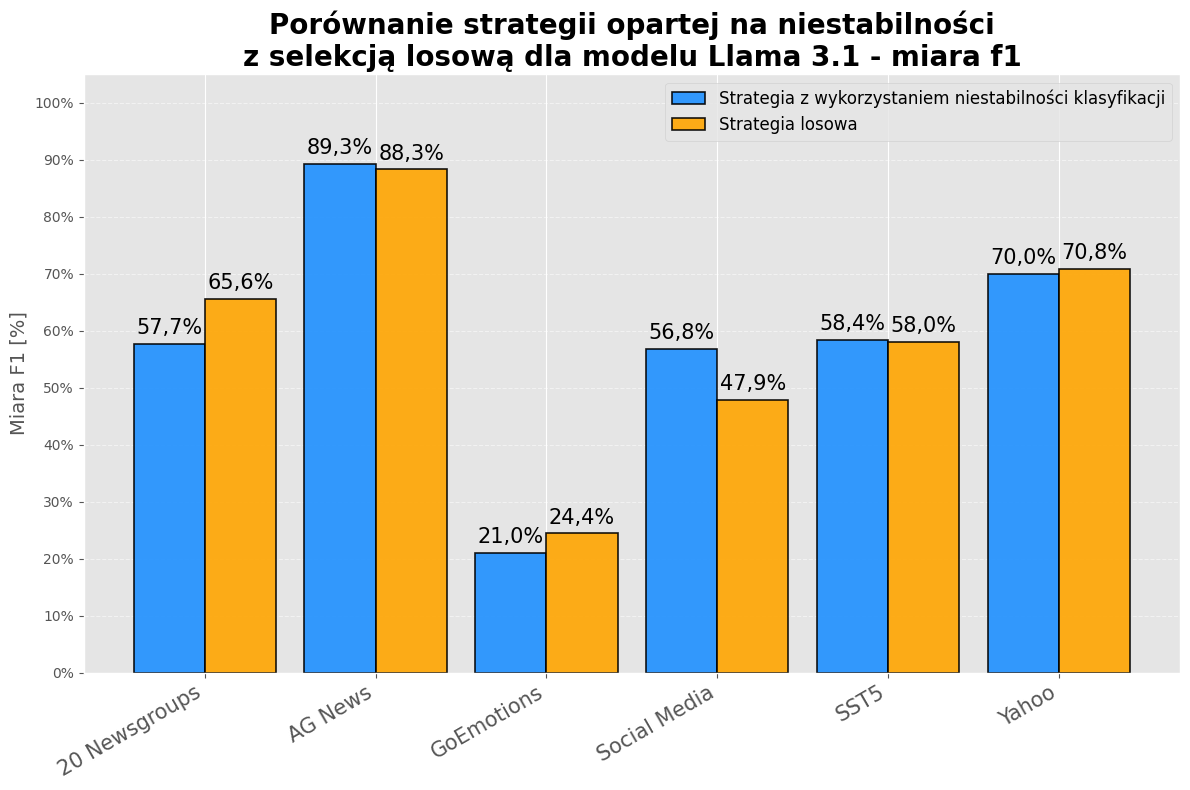

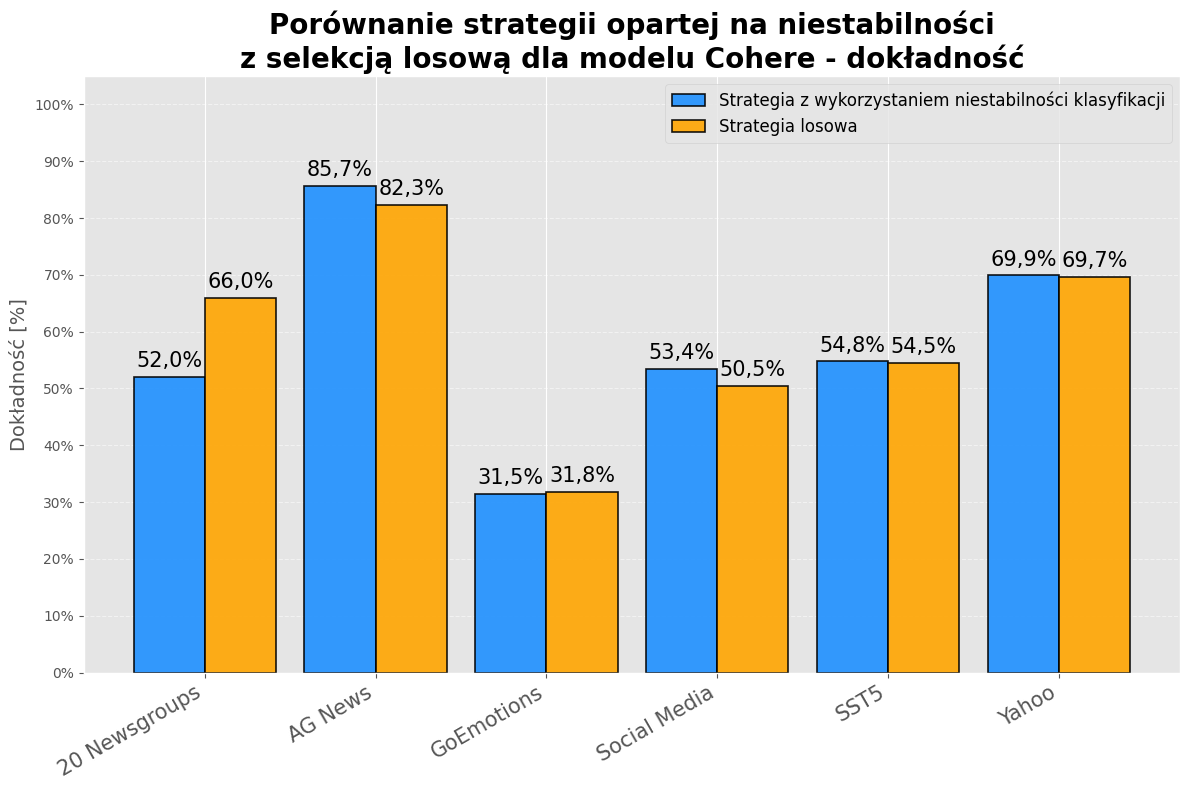

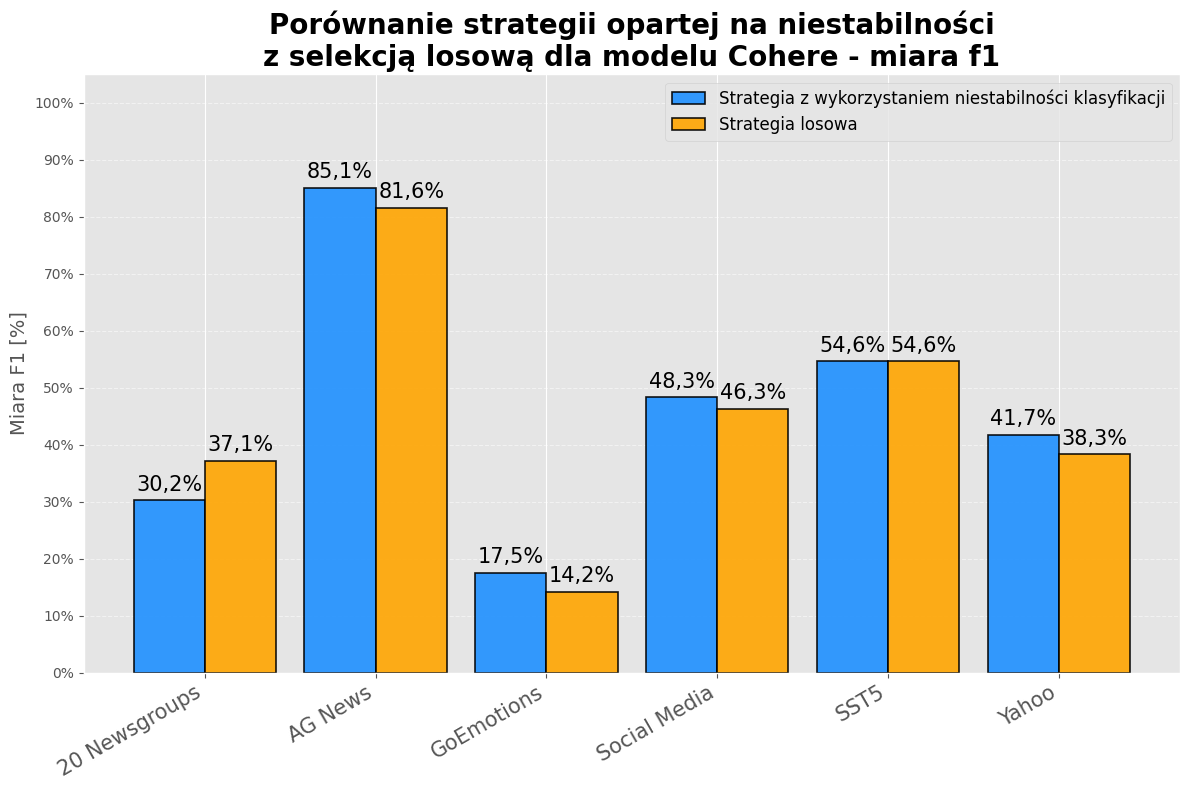

In [5]:
import pandas as pd
import numpy as np



# Pierwsza tabela: Wyniki oceny modeli
data_1_updated = {
    "Dataset": [
        "20 Newsgroups", "20 Newsgroups", "20 Newsgroups", 
        "AG News", "AG News", "AG News", 
        "GoEmotions", "GoEmotions", "GoEmotions", 
        "Social Media", "Social Media", "Social Media", 
        "SST5", "SST5", "SST5", 
        "Yahoo", "Yahoo", "Yahoo"
    ],
    "Model": [
        "GPT-4o Mini", "Llama 3.1", "Cohere", 
        "GPT-4o Mini", "Llama 3.1", "Cohere", 
        "GPT-4o Mini", "Llama 3.1", "Cohere", 
        "GPT-4o Mini", "Llama 3.1", "Cohere", 
        "GPT-4o Mini", "Llama 3.1", "Cohere", 
        "GPT-4o Mini", "Llama 3.1", "Cohere"
    ],
"Accuracy": [
        69.5, 73.8, 52.0, 87.3, 89.3, 85.7, 36.9, 36.4, 31.5, 49.5, 70.4, 53.4, 58.0, 58.6, 54.8, 70.4, 71.4, 69.9
    ],
    "F1": [
        64.7, 57.7, 30.2, 87.2, 89.3, 85.1, 36.2, 21.0, 17.5, 47.7, 56.8, 48.3, 58.1, 58.4, 54.6, 53.8, 70.0, 41.7
    ]}

# Druga tabela: Wyniki oceny modeli - zapytania losowe
data_2_updated = {
    "Dataset": [
        "20 Newsgroups", "20 Newsgroups", "20 Newsgroups", 
        "AG News", "AG News", "AG News", 
        "GoEmotions", "GoEmotions", "GoEmotions", 
        "Social Media", "Social Media", "Social Media", 
        "SST5", "SST5", "SST5", 
        "Yahoo", "Yahoo", "Yahoo"
    ],
    "Model": [
        "GPT-4o Mini", "Llama 3.1", "Cohere", 
        "GPT-4o Mini", "Llama 3.1", "Cohere", 
        "GPT-4o Mini", "Llama 3.1", "Cohere", 
        "GPT-4o Mini", "Llama 3.1", "Cohere", 
        "GPT-4o Mini", "Llama 3.1", "Cohere", 
        "GPT-4o Mini", "Llama 3.1", "Cohere"
    ],
    "Accuracy": [
        70.9, 75.6, 66.0, 86.4, 88.4, 82.3, 37.1, 37.7, 31.8, 41.5, 63.4, 50.5, 56.8, 57.9, 54.5, 70.6, 71.7, 69.7
    ],
    "F1": [
        66.1, 65.6, 37.1, 69.1, 88.3, 81.6, 34.8, 24.4, 14.2, 42.1, 47.9, 46.3, 56.9, 58.0, 54.6, 56.1, 70.8, 38.3
    ]
}


df_graph = pd.DataFrame(data_1_updated)
df_random = pd.DataFrame(data_2_updated)

import matplotlib.pyplot as plt
import numpy as np
import os

plt.style.use('ggplot')

def plot_and_save_separate_metrics(folder='wykresy'):
    os.makedirs(folder, exist_ok=True)

    models = ["GPT-4o Mini", "Llama 3.1", "Cohere"]
    metrics = [("Accuracy", "Dokładność"), ("F1", "Miara F1")]
    datasets = df_graph["Dataset"].unique()
    n_datasets = len(datasets)
    width = 0.5  # szerokość słupków

    gap = 1.2  # odstęp między grupami słupków

    for model in models:
        df_g = df_graph[df_graph["Model"] == model].reset_index(drop=True)
        df_r = df_random[df_random["Model"] == model].reset_index(drop=True)

        for metric_key, metric_label in metrics:
            plt.figure(figsize=(12, 8))

            graf_vals = df_g[metric_key].values
            random_vals = df_r[metric_key].values

            ind = np.arange(n_datasets) * gap  # zwiększony odstęp między grupami

            bars1 = plt.bar(ind - width/2, graf_vals, width, label='Strategia z wykorzystaniem niestabilności klasyfikacji',
                            color='dodgerblue', edgecolor='black', linewidth=1.2, alpha=0.9)
            bars2 = plt.bar(ind + width/2, random_vals, width, label='Strategia losowa',
                            color='orange', edgecolor='black', linewidth=1.2, alpha=0.9)

            plt.ylim(0, 105)
            plt.ylabel(f'{metric_label} [%]', fontsize=14)
            plt.title(f'Porównanie strategii opartej na niestabilności\nz selekcją losową dla modelu {model} - {metric_label.lower()}', 
          fontsize=20, fontweight='bold')

            plt.grid(axis='y', linestyle='--', alpha=0.5)

            plt.yticks(np.arange(0, 110, 10), [f"{x}%" for x in range(0, 110, 10)])

            plt.xticks(ind, datasets, rotation=30, ha='right', fontsize=15)

            # Wartości nad słupkami z przecinkiem
            for bar in bars1:
                w = bar.get_height()
                tekst = f'{w:.1f}'.replace('.', ',') + '%'
                plt.text(bar.get_x() + bar.get_width()/2, w + 1, tekst, ha='center', va='bottom', fontsize=15)
            for bar in bars2:
                w = bar.get_height()
                tekst = f'{w:.1f}'.replace('.', ',') + '%'
                plt.text(bar.get_x() + bar.get_width()/2, w + 1, tekst, ha='center', va='bottom', fontsize=15)

            plt.legend(fontsize=12)
            plt.tight_layout()

            filename = f"{folder}/wyniki_niestabilne_{metric_key.lower()}_{model.replace(' ', '_').replace('.', '')}.png"
            plt.savefig(filename, dpi=300, bbox_inches='tight')
            plt.show()
            plt.close()

plot_and_save_separate_metrics()
